# Task 1 (15p)
- The first is about performing an EDA over the assigned dataset to get an insight about the dataset
    - Exploratory data analysis for assigned dataset.
    - Description of data and your work containing hypothesis/answers.
    - Visualizations and result's explanation.
    - 📒 Comment your analysis insight gained in a Markdown cells

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.preprocessing, sklearn.cluster, sklearn.metrics
import scipy.spatial
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

### Loading and displaying the dataset

In [2]:
df = pd.read_csv("audi.csv")
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


# Dataset of used Audi cars
This dataset contains information about used Audi cars. Available attributes include:
- `model`: Car model.
- `year`: Registration year.
- `price`: Price in Euros.
- `transmission`: Transmission type (manual, automatic, semi-automatic).
- `mileage`: Mileage of the car (in miles).
- `fuelType`: Fuel type (petrol, diesel, hybrid, etc.).
- `tax`: Road tax of the car.
- `mpg`: Fuel consumption (miles per gallon).
- `engineSize`: Engine size (in liters).

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


### Get basic info about the dataset (number of rows/columns, data types, missing values)

In [4]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


### Display statistical values (mean, median, min, max) for numerical columns

### We found that the engineSize column contains values with engine size 0. Since this value is not real, we remove these records from the dataset to avoid biasing the analysis

In [5]:
df = df[df['engineSize'] > 0]
zero_engine_size_count = (df['engineSize'] == 0.0).sum()
zero_engine_size_count

np.int64(0)

### Count the number of missing values in each column

In [6]:
df.isna().sum().sort_values(ascending=False)

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

### There are not others empty values, so there is no need to remove 

### Count rows and attributes

In [7]:
shape = df.shape
shape

(10611, 9)

This dataset contains 10611 records of Audi cars with 9 attributes
### Lets see, what data types our dataset have

In [8]:
dtypes = df.dtypes
dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

### Hypotesis: Cars that have more mileage are worth less

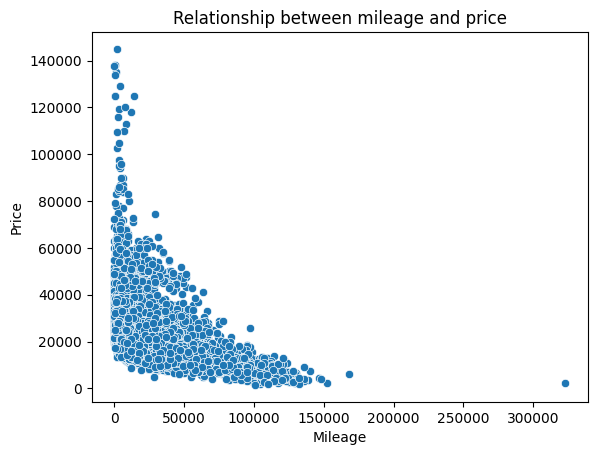

In [9]:
sns.scatterplot(x='mileage', y='price', data=df)
plt.title("Relationship between mileage and price")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

This graph shows the relationship between the mileage of a car (`mileage`) and its price (`price`). We clearly see a negative relationship - cars with higher mileage tend to have a lower price.


### Hypotesis: cars with bigger engines cost more money

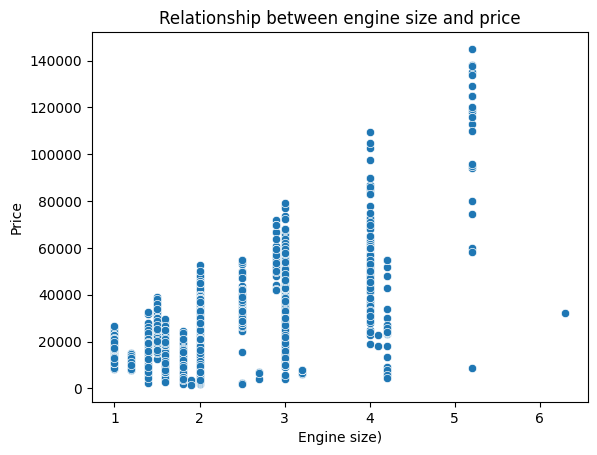

In [10]:
sns.scatterplot(x='engineSize', y='price', data=df)
plt.title("Relationship between engine size and price")
plt.xlabel("Engine size)")
plt.ylabel("Price")
plt.show()

This graph shows the relationship between engine size (`engineSize`) and car price (`price`). The graph shows that larger engines are associated with a higher car price, reflecting the fact that larger engines are usually more powerful and more expensive.

### Hypotesis: cars that are newer cost more money

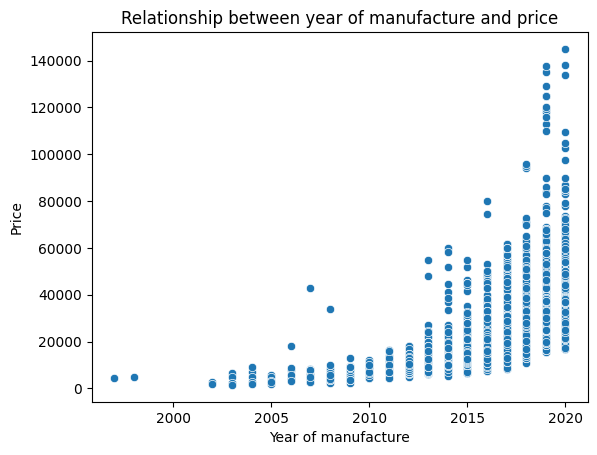

In [11]:
sns.scatterplot(x='year', y='price', data=df)
plt.title("Relationship between year of manufacture and price")
plt.xlabel("Year of manufacture")
plt.ylabel("Price")
plt.show()

This chart shows the relationship between the year of manufacture of a car (`year`) and its price (`price`). We can see that newer cars (made after 2015) tend to be more expensive. This makes sense because newer models usually contain better technology.

### Hypotesis: hybrid (electirc) cars cost more money.

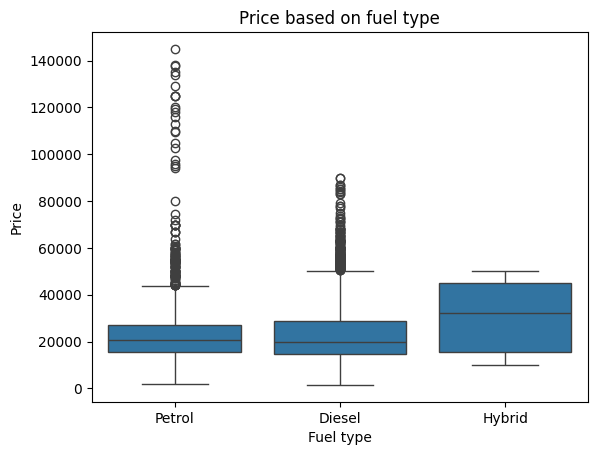

In [12]:
sns.boxplot(x='fuelType', y='price', data=df)
plt.title("Price based on fuel type")
plt.xlabel("Fuel type")
plt.ylabel("Price")
plt.show()

This boxplot shows car prices by fuel type (`fuelType`):
- Hybrid cars have the highest median price, which is likely due to their higher purchase price and advanced technology.
- Petrol and diesel cars have a similar price range, with median prices slightly lower than hybrids.
- There are also a few cars in the dataset with extreme prices, which may be luxury models.

### Hypotesis: What type of gearbox is the most expensive?

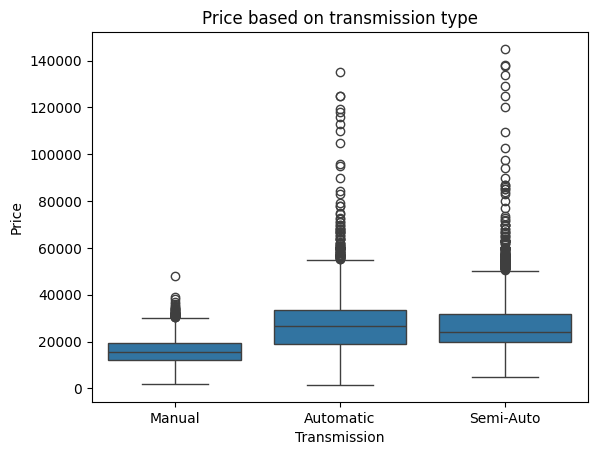

In [13]:
sns.boxplot(x='transmission', y='price', data=df)
plt.title("Price based on transmission type")
plt.xlabel("Transmission")
plt.ylabel("Price")
plt.show()

This boxplot shows car prices by transmission type (`transmission`). Automatic and semi-automatic transmissions have higher median prices than manual transmissions, which may be due to their higher demand or technological complexity.


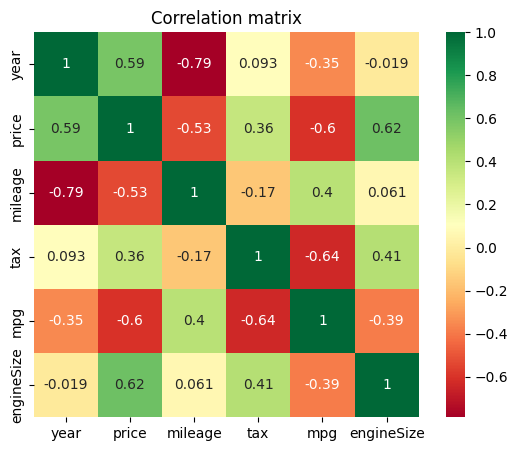

In [14]:
columns = ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']
corr_matrix = df[columns].corr()

plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, square=True, cmap="RdYlGn", annot=True)
plt.title("Correlation matrix")
plt.show()

The correlation matrix shows the relationships between the numerical variables of the dataset. The main findings include:
- Strong positive correlation between `engineSize` and `price` (+0.62), confirming that larger engines increase the price of the car.
- Negative correlation between `mileage` and `price` (-0.53), showing that higher mileage reduces price.
- Positive correlation between `year` and `price` (+0.59), confirming that newer cars are usually more expensive.
- Strong negative correlation between `mpg` and `tax` (-0.64), suggesting that cars with lower consumption (higher `mpg`) have lower tax.
- The correlation between `year` and `mileage` (-0.79) indicates that newer cars tend to have lower mileage, which is expected.

# Task 2 (30p)
- The second task is focused on the clustering analysis
- Describe your preprocessing pipeline
    - This step can also be based on the insight from the first task
    - I.e. Describe what operations you are performing for each of the features
        - e.g. No operation needed, dropping the feature, Min-Max scaling, One-hot encoding, Categorization (numeric -> categorical) etc.
        - You can even try to experiment with many different preprocession operations and you will see what works the best -
            - This is totally up to you!

### Encoding categorical variables
We need to convert the categorical variables (`fuelType` and `transmission`) into numerical representations, as clustering algorithms like K-Means work only with numerical data. We use One-Hot Encoding to create binary columns for each category. For example:
- `fuelType` will be split into `fuelType_Diesel`, `fuelType_Hybrid`, `fuelType_Petrol`
- `transmission` will be split into `transmission_Manual`, `transmission_Semi-Auto`, `transmission_Automatic`.

In [15]:
df_encoded = pd.get_dummies(df, columns=['fuelType', 'transmission'])
df_encoded.head()

,model,year,price,mileage,tax,mpg,engineSize,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol,transmission_Automatic,transmission_Manual,transmission_Semi-Auto
0,A1,2017,12500,15735,150,55.4,1.4,False,False,True,False,True,False
1,A6,2016,16500,36203,20,64.2,2.0,True,False,False,True,False,False
2,A1,2016,11000,29946,30,55.4,1.4,False,False,True,False,True,False
3,A4,2017,16800,25952,145,67.3,2.0,True,False,False,True,False,False
4,A3,2019,17300,1998,145,49.6,1.0,False,False,True,False,True,False


In [16]:
duplicateRows = df_encoded.duplicated().sum()
print("There are " + str(duplicateRows) + " duplicate rows in the dataset.")

df_encoded = df_encoded.drop_duplicates()
removedRows = df_encoded.duplicated().sum()
print("There are " + str(removedRows) + " duplicates now.")

There are 98 duplicate rows in the dataset.
There are 0 duplicates now.


There are 12 duplicate rows in the dataset. For the purpose of this task, we will remove them.

### Feature selection before scaling
Before scaling, we need to remove the following column:
1. **`model`:** This column contains text-based identifiers for car models, which are not suitable for clustering.

In [17]:
df_encoded.drop(columns=['model'], inplace=True)
df_encoded.head()

,year,price,mileage,tax,mpg,engineSize,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol,transmission_Automatic,transmission_Manual,transmission_Semi-Auto
0,2017,12500,15735,150,55.4,1.4,False,False,True,False,True,False
1,2016,16500,36203,20,64.2,2.0,True,False,False,True,False,False
2,2016,11000,29946,30,55.4,1.4,False,False,True,False,True,False
3,2017,16800,25952,145,67.3,2.0,True,False,False,True,False,False
4,2019,17300,1998,145,49.6,1.0,False,False,True,False,True,False


### Visualizing data before scaling
Before applying any scaling method, we should visualize the numerical features to understand their distribution and range. This helps us decide which scaling method is most appropriate.

We use the `df.hist()` function to create histograms for all numerical columns in the dataset.

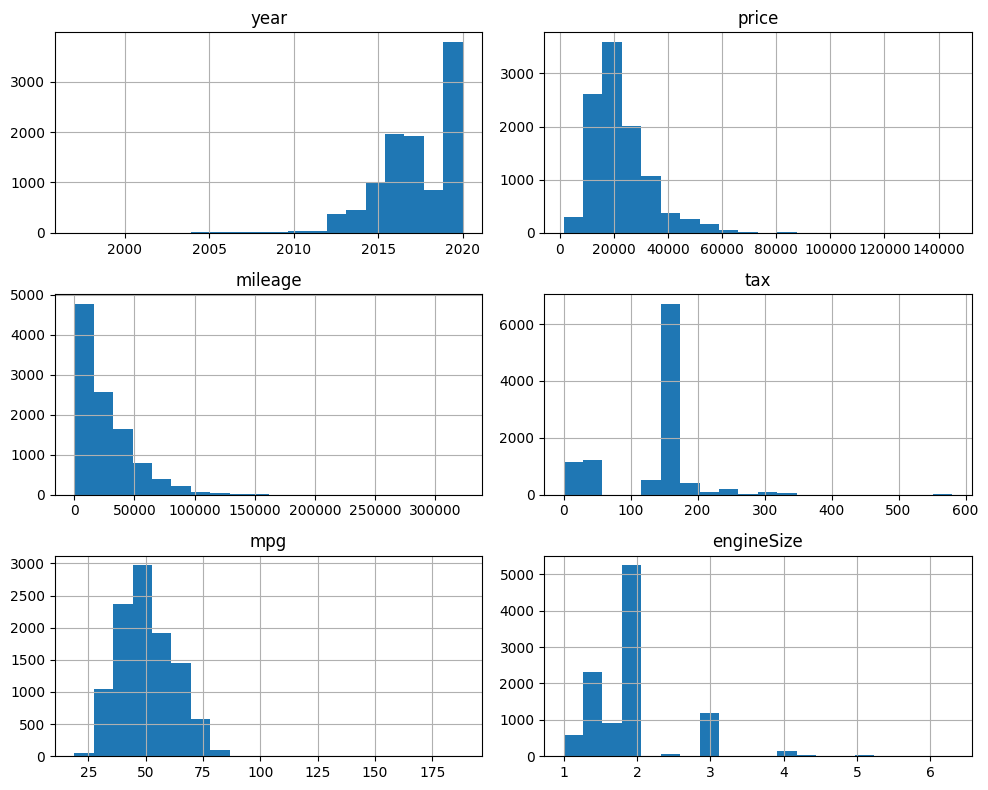

In [18]:
df_encoded.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

### Updated Scaling Methods for Numerical Features
Based on the analysis of the data distributions:

1. **Power Transformer:**
   - Used for features with long tails or high skewness.
   - Features: `mileage`, `price`, `tax` (to reduce the impact of outliers).
2. **Min-Max Scaling:**
   - Used for features with narrow ranges or less skewness.
   - Features: `mpg`, `engineSize`, `year`.
3. **Rationale:**
   - `mileage` and `price` show long tails, so Power Transformer is ideal.
   - `tax` has some outliers, and Power Transformer helps normalize it.
   - `mpg` and `engineSize` are well-distributed and fit Min-Max Scaling.
   - `year` is normalized to prevent it from dominating clustering due to larger values.


In [19]:
power_transform_features = ['mileage', 'price', 'tax']
min_max_scaling_features = ['mpg', 'engineSize', 'year']

power_transformer = sklearn.preprocessing.PowerTransformer()
df_encoded[power_transform_features] = power_transformer.fit_transform(df_encoded[power_transform_features])

minmax_scaler = sklearn.preprocessing.MinMaxScaler()
df_encoded[min_max_scaling_features] = minmax_scaler.fit_transform(df_encoded[min_max_scaling_features])


In [20]:
X = df_encoded.values

In [21]:
clustering_scores = []
for k in range(2, 11):
    clustering = sklearn.cluster.KMeans(n_clusters=k, random_state=69).fit(X)
    clustering_scores.append({
        'k': k,
        'sse': clustering.inertia_,
        'silhouette': sklearn.metrics.silhouette_score(X, clustering.labels_)
    })
df_clustering_scores = pd.DataFrame.from_dict(clustering_scores, orient='columns')
df_clustering_scores = df_clustering_scores.set_index('k')

In [22]:
df_clustering_scores

,sse,silhouette
k,,
2,28594.369801,0.321850
3,22163.347417,0.296818
4,19551.110285,0.274423
5,17675.079112,0.274426
6,16366.714396,0.271057
7,15405.452330,0.280124
8,14482.240658,0.263732
9,13127.397256,0.295420
10,12370.642953,0.296255


<Axes: xlabel='k', ylabel='sse'>

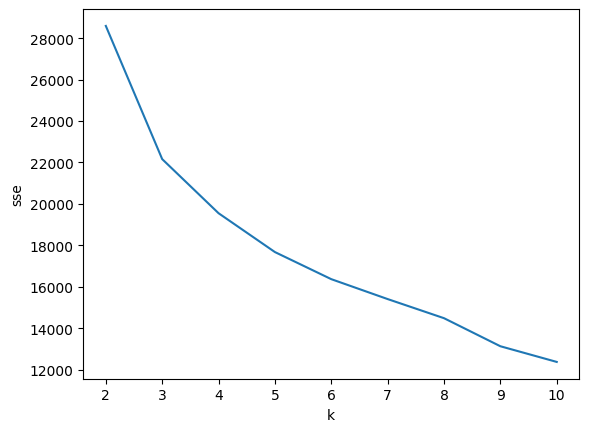

In [23]:
sns.lineplot(data = df_clustering_scores, y='sse', x='k')

<Axes: xlabel='k', ylabel='silhouette'>

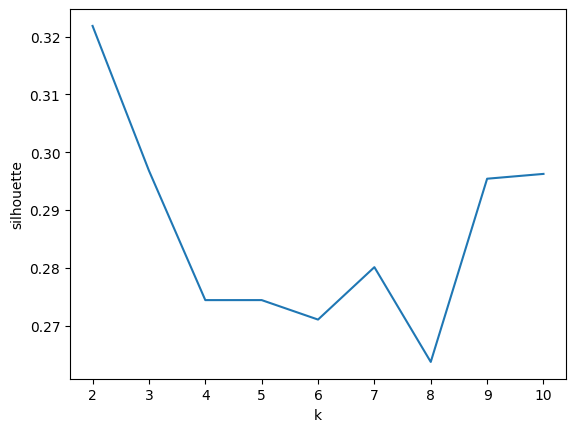

In [24]:
sns.lineplot(data = df_clustering_scores, y='silhouette', x='k')

Using elbow method and silhouette coefficient i chose 3 clusters.  

In [25]:
clustering = sklearn.cluster.KMeans(n_clusters=3, random_state=13)
df_encoded['Cluster'] = clustering.fit_predict(X)

Lets see how big clusters are 

In [26]:
pd.Series(clustering.labels_).value_counts()

1    4457
2    3687
0    2369
Name: count, dtype: int64

This step uses a countplot to visualize the distribution of data points across the identified clusters. It provides an overview of how many data points belong to each cluster, which is useful for understanding the size and balance of the clusters formed by the K-Means algorithm.

<Axes: xlabel='Cluster', ylabel='count'>

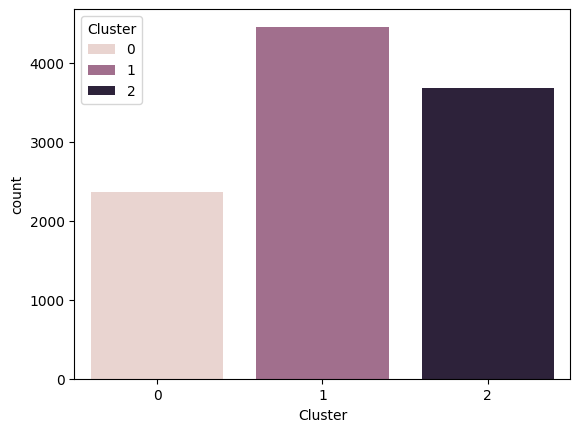

In [27]:
sns.countplot(data=df_encoded, x='Cluster', hue='Cluster')

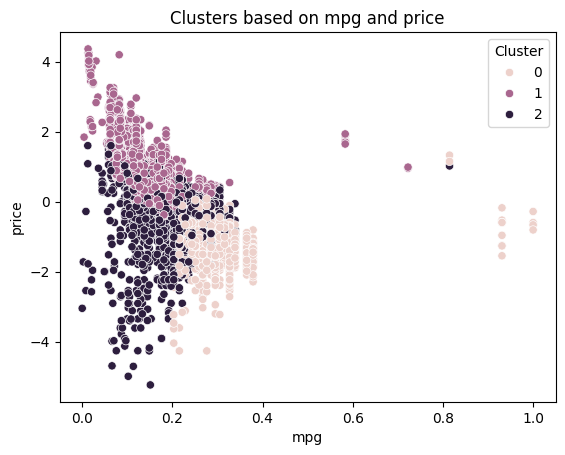

In [28]:
sns.scatterplot(x='mpg', y='price', hue='Cluster', data=df_encoded)
plt.title("Clusters based on mpg and price")
plt.show()

We can see that cluster 1 has the most cars, then cluster 2 and cluster 0 has the least cars.

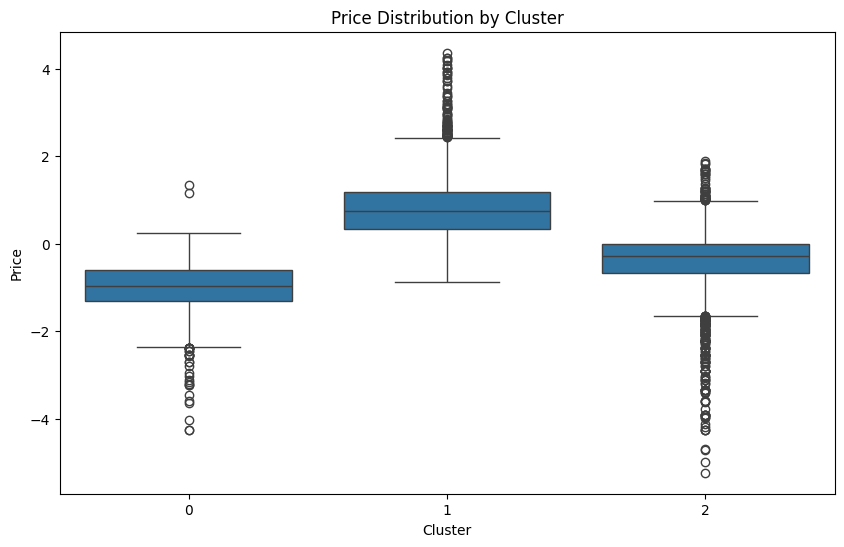

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_encoded, x='Cluster', y='price')
plt.title('Price Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Price')
plt.show()

### Boxplot Analysis: Price Distribution Across Clusters

This boxplot provides an overview of how the `price` attribute is distributed across different clusters. Each cluster represents a group of vehicles categorized by similar characteristics. The main observations are:

1. **Cluster 0**:
   - The median price is below zero, suggesting lower-priced vehicles dominate this cluster.
   - The range of prices is relatively narrow compared to other clusters, with fewer outliers.

2. **Cluster 1**:
   - The median price is slightly above zero, indicating vehicles with moderate pricing.
   - This cluster has cars with the biggest prize.

3. **Cluster 2**:
   - The median price is higher than Cluster 1 and ranks as the second-highest among all clusters.

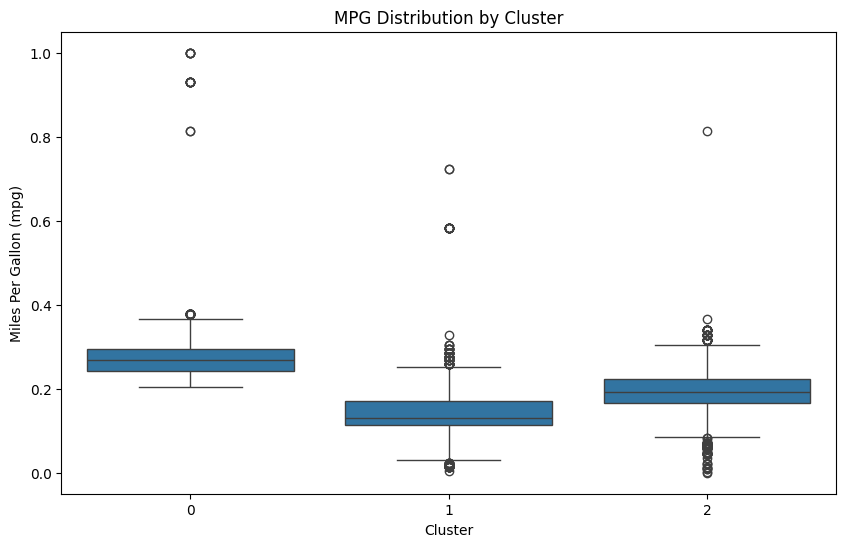

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_encoded, x='Cluster', y='mpg')
plt.title('MPG Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Miles Per Gallon (mpg)')
plt.show()

### Boxplot Analysis: Miles Per Gallon (mpg) Distribution Across Clusters

This boxplot provides an overview of how the mpg (Miles Per Gallon) attribute is distributed across different clusters. Each cluster represents a group of vehicles categorized by similar characteristics. The main observations are:

1. **Cluster 0**:
   - The highest median mpg among all clusters, indicating vehicles in this cluster are the most fuel-efficient.
   - A few outliers at the higher end, suggesting extremely fuel-efficient vehicles.

2. **Cluster 1**:
   - The lowest median mpg among all clusters, indicating this cluster contains vehicles with the poorest fuel efficiency.

3. **Cluster 2**:
   - vehicles in this cluster are medium fuel-efficient.

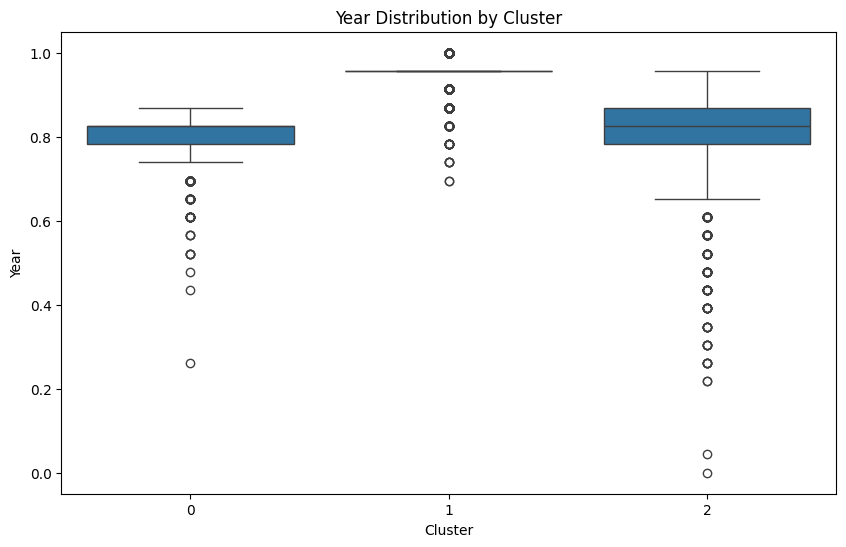

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_encoded, x='Cluster', y='year')
plt.title('Year Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Year')
plt.show()

### Boxplot Analysis: Year Distribution Across Clusters

1. **Cluster 0 and Cluster2**:
   - These clusters have approximately the same median for year. Cluster 2 have more outliners. 

2. **Cluster 1**:
   - The highest median year among all clusters. In this cluster there are cars that are the newest of all.

<Axes: xlabel='Cluster', ylabel='engineSize'>

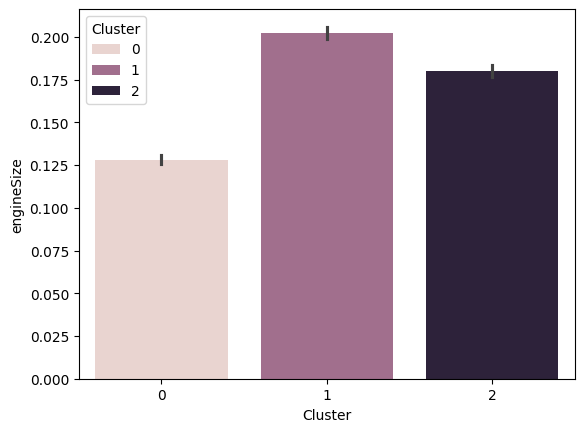

In [32]:
sns.barplot(data=df_encoded, y="engineSize", x="Cluster", hue="Cluster")

### Boxplot Analysis: Engine Size Distribution Across Clusters

1. **Cluster 0**:
   - This cluster represents cars with the smallest average engine size among all clusters.
   - Likely includes smaller, more fuel-efficient vehicles (e.g., city cars or compact models). 

2. **Cluster 1**:
   - Contains cars with the largest average engine size.
   - Likely includes vehicles designed for performance or heavy-duty usage (e.g., SUVs or sports cars).
3. **Cluster 2**:
   - This cluster has a moderate average engine size, falling between Cluster 0 and Cluster 1.
   - Likely includes standard passenger vehicles or sedans.

Text(0, 0.5, '')

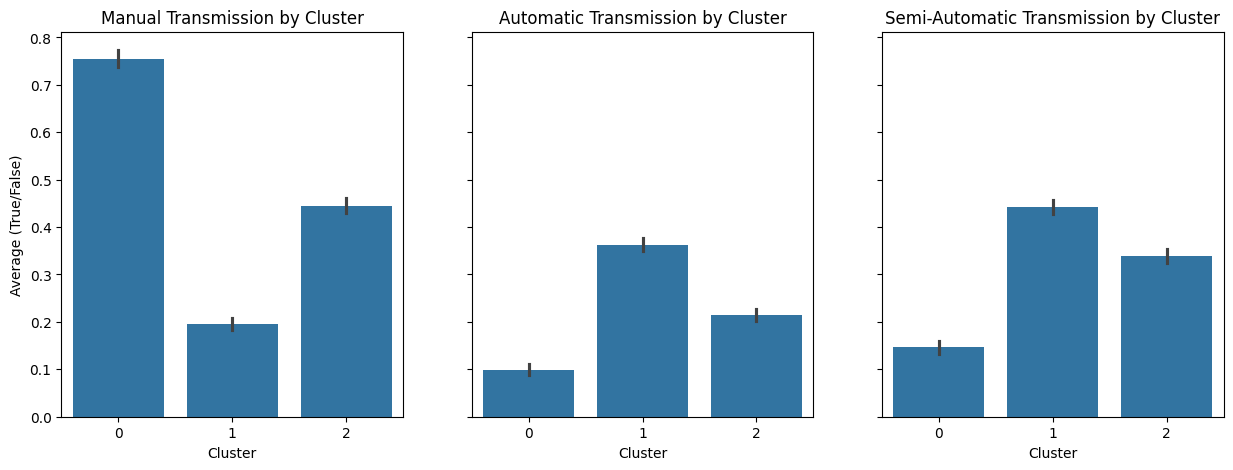

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

sns.barplot(data=df_encoded, x='Cluster', y='transmission_Manual', ax=axes[0])
axes[0].set_title('Manual Transmission by Cluster')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Average (True/False)')

sns.barplot(data=df_encoded, x='Cluster', y='transmission_Automatic', ax=axes[1])
axes[1].set_title('Automatic Transmission by Cluster')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('')

sns.barplot(data=df_encoded, x='Cluster', y='transmission_Semi-Auto', ax=axes[2])
axes[2].set_title('Semi-Automatic Transmission by Cluster')
axes[2].set_xlabel('Cluster')
axes[2].set_ylabel('')

### Boxplot Analysis: Transmission Distribution Across Clusters

1. **Cluster 0**:
   - Manual gearboxes, aimed at economy and mainstream vehicles, dominate strongly.

2. **Cluster 1**:
   - The largest representation of automatic and semi-automatic transmissions, probably luxury cars.

3. **Cluster 2**:
   - A balanced combination of all gearbox types, covering a diverse group of vehicles.

### Conclusion for clusters

**Cluster 0**: This cluster includes affordable and fuel-efficient vehicles that are dominated by manual transmissions. Vehicles in this cluster have the highest fuel efficiency (highest median `mpg`), lowest price and smallest engine size. (Probably urban and compact vehicles.)

**Cluster 1**: Vehicles in this cluster have the highest prices, largest engines and lowest fuel efficiency (`mpg`). They are most often equipped with automatic or semi-automatic transmissions. (Probably luxury cars.)

**Cluster 2**: This cluster is a balanced group of standard vehicles that combines average price, fuel efficiency and engine size.

# Part 2
- Choose any other algorithm from the documentation and repeat the steps from the Part 1
    - Check some blog posts, book chapters, Youtube videos, ... about the algorithm you have chosen so you have some basic knowledge about the key concepts of the selected algorithm
        - 🚀 Agglomerative clustering is a good starting point! 🙂
- ❌ BEWARE: This task is worth 10 points so skipping it means that the maximum score for the project will be 35 points!

In [34]:
x = df_encoded.iloc[:,[2,3]].values
x.shape

(10513, 2)

### We create a Dendrogram to find out the number of clusters

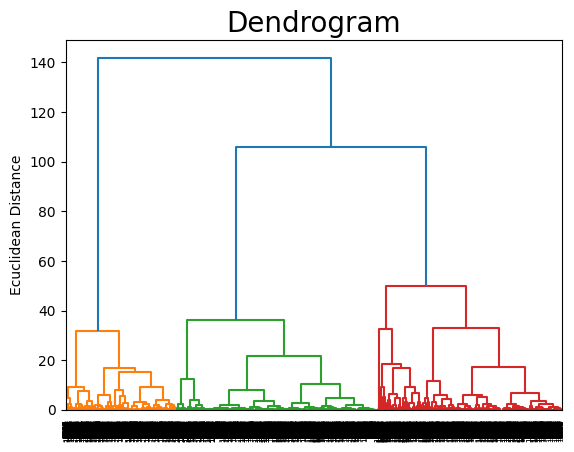

In [35]:
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram', fontsize = 20)
plt.ylabel('Ecuclidean Distance')
plt.show()

### The dendogram shows that the number of clusters could be 3. We'll do the clustering

In [36]:
hc = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)
pd.Series(hc.labels_).value_counts()

2    4273
0    3881
1    2359
Name: count, dtype: int64

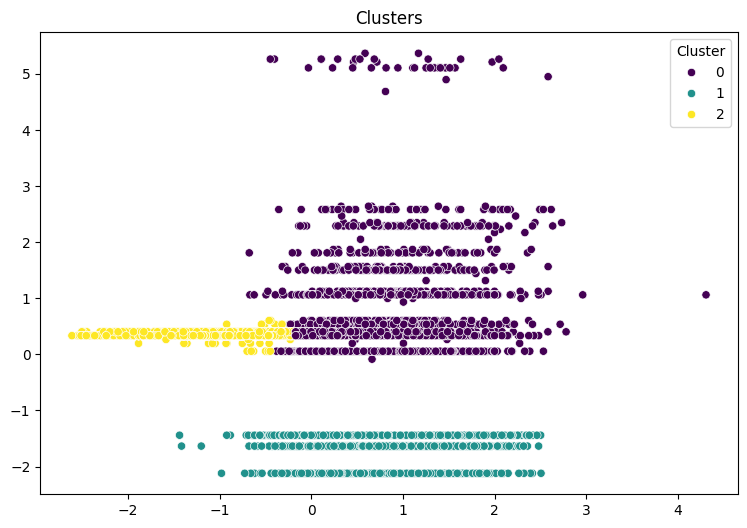

In [37]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y_hc, palette='viridis')
plt.title("Clusters")
plt.legend(title="Cluster")
plt.show()

The distribution of clusters shows that:

- **Cluster 0 (purple)**: Most points clustered around a certain value on the X and Y axis. Probably the mean value for the given attributes.
- **Cluster 1 (green)**: Smaller group of data that is outside the main group (e.g. cars with lower price or other specific characteristics)
- **Cluster 2 (yellow)**: A clearly separated cluster, probably cars with significantly different attribute values (e.g. low price and lower consumption)                                                                                                                                            

In [38]:
df_encoded['Cluster'] = y_hc
df_encoded.head()

,year,price,mileage,tax,mpg,engineSize,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,Cluster
0,0.869565,-1.042740,-0.098281,0.401838,0.215466,0.075472,False,False,True,False,True,False,0
1,0.826087,-0.462539,0.723864,-1.635710,0.267414,0.188679,True,False,False,True,False,False,1
2,0.826087,-1.307242,0.516726,-1.441766,0.215466,0.075472,False,False,True,False,True,False,1
3,0.869565,-0.424610,0.368652,0.333671,0.285714,0.188679,True,False,False,True,False,False,0
4,0.956522,-0.362803,-1.393091,0.333671,0.181228,0.000000,False,False,True,False,True,False,2


<Axes: xlabel='Cluster', ylabel='count'>

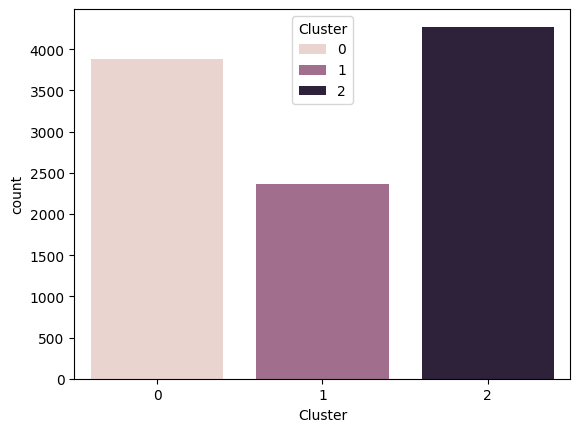

In [39]:
sns.countplot(data=df_encoded, x='Cluster', hue='Cluster')

Here we can see the division of data into clusters. Cluster 2 has the largest number of elements, then there is cluster 0, which has a little less and last is cluster 1, which has the smallest number of clusters.

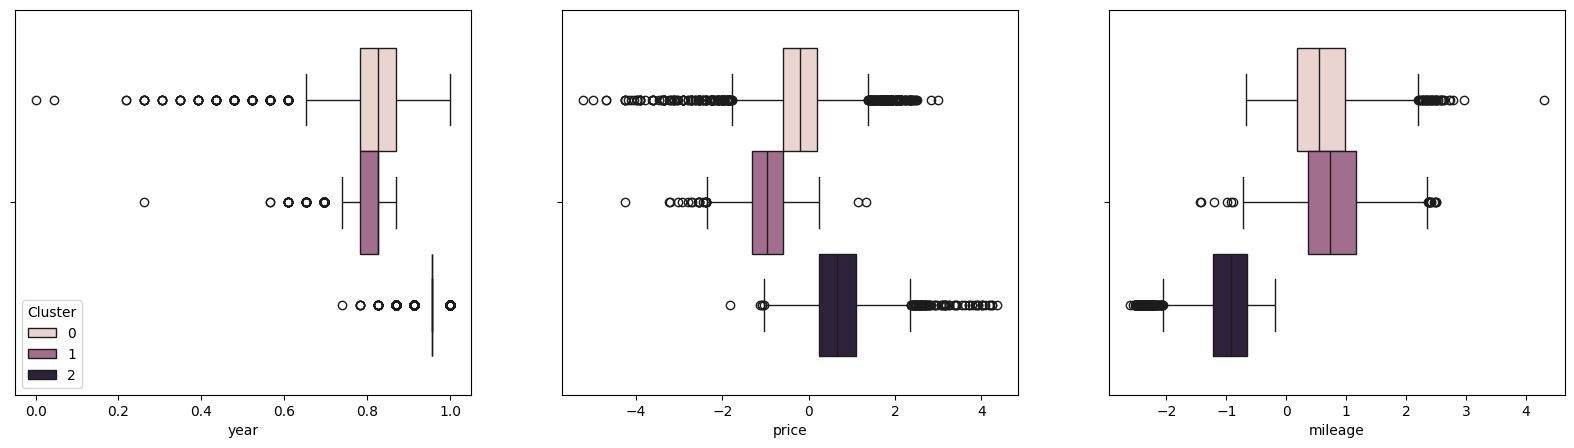

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
sns.boxplot(data=df_encoded, x='year', hue='Cluster', ax=axes[0])
sns.boxplot(data=df_encoded, x='price', hue='Cluster', ax=axes[1], legend=False)
sns.boxplot(data=df_encoded, x='mileage', hue='Cluster', ax=axes[2], legend=False)
plt.show()

From the graphs we can read the following informations:
- **Cluster 0**: Contains cars that are the oldest, have the highest mileage, but at the same time have a medium price
- **Cluster 1**: contains cars that are the same age or only slightly newer than in cluster 0, but these cars have the lowest average price and the highest mileage
- **Cluster 2**: contains cars that are newer and more expensive and also have less mileage.

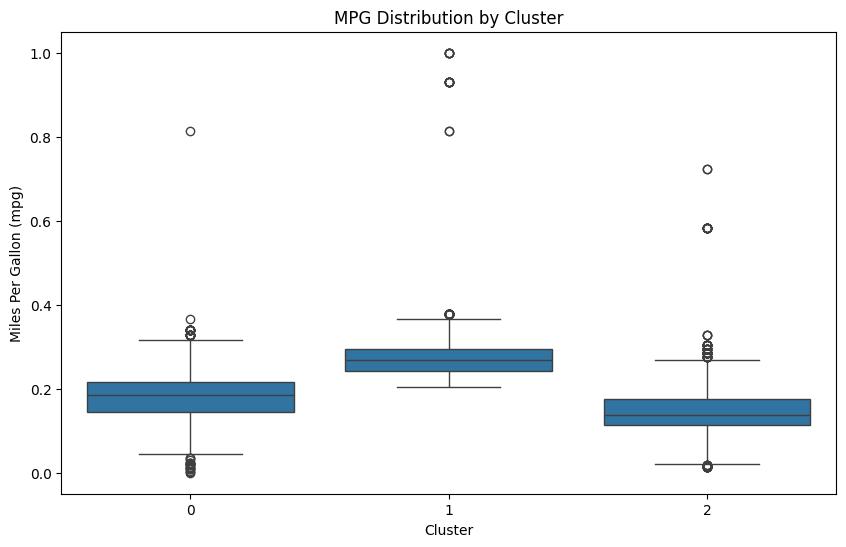

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_encoded, x='Cluster', y='mpg')
plt.title('MPG Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Miles Per Gallon (mpg)')
plt.show()

### Boxplot Analysis: MPG Distribution by Cluster

- **Cluster 0**: Highest median mpg, Significant outliers with high mpg.
- **Cluster 1**: Lowest median mpg, fuel efficient vehicles.
- **Cluster 2**: Average fuel efficiency, standard vehicles with balanced performance and fuel economy.


<Axes: xlabel='Cluster', ylabel='engineSize'>

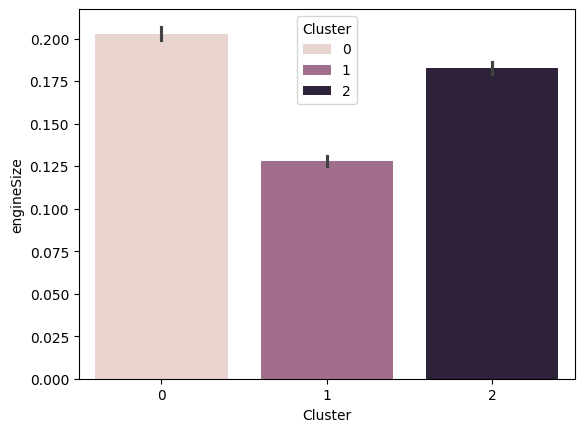

In [42]:
sns.barplot(data=df_encoded, y="engineSize", x="Cluster", hue="Cluster")

### Barplot Analysis: Engine Size by Cluster

- **Cluster 0**: Largest average engine size, likely includes high-performance or luxury vehicles such as SUVs or sports cars.
- **Cluster 1**: Smallest average engine size, indicating a focus on economy and fuel-efficient vehicles such as city cars.
- **Cluster 2**: Medium average engine size, including standard passenger cars and performance-balanced sedans.


### Conclusion of the cluster analysis

- **Cluster 0**: Contains cars with the largest average engine size and highest fuel efficiency (mpg). These cars are the oldest, have the highest mileage and median price, indicating efficient but economical vehicles.
- **Cluster 1**: Contains cars with the smallest average engine size and lowest price. These vehicles have the highest mileage and are geared towards economy and everyday use.
- **Cluster 2**: Includes newer and more expensive vehicles with average engine size and fuel efficiency. These vehicles have lower mileage, suggesting modern, balanced passenger cars.


### Differences between Agglomerative Clustering and K-Means conclusions

1. **Cluster 0**:
   - **Agglomerative Clustering**: Has the largest average engine size, highest fuel efficiency (mpg), and highest age and mileage. Price is at the mid-level.
   - **K-Means**: Has the smallest engine size, highest fuel efficiency (mpg), and lowest price. Manual transmissions dominate.

2. **Cluster 1**:
   - **Agglomerative Clustering**: Has the smallest engine size, lowest price, and highest mileage. Fuel efficiency is lower.
   - **K-Means**: Has the largest engine size, lowest fuel efficiency (mpg) and highest price. Automatic and semi-automatic transmissions dominate.

3. **Cluster 2**:
   - **Agglomerative Clustering**: Has average engine size, fuel efficiency, and low mileage. Price is higher.
   - **K-Means**: Has average engine size, fuel efficiency and price. Combines characteristics between other clusters.

### Summary of differences:
- **Agglomerative Clustering** takes more account of characteristics such as vehicle age and mileage, which affects the interpretation of clusters.
- **K-Means** focuses more on technical characteristics such as engine size, fuel efficiency, and transmission type.
- The cluster distribution varies according to the algorithm's priorities - Agglomerative emphasizes physical attributes of vehicles, while K-Means focuses more on market characteristics. 


# Summary

- **Exploration**:
    - Initially explored the dataset to understand the key attributes influencing car prices.
    - Average mileage and engine size are consistent with expectations for used vehicles.
    - Transmission types were predominantly manual or semi-automatic.
    - Fuel types included diesel, petrol, and hybrids, with varied impacts on fuel efficiency (mpg).
    - Price distribution showed significant variation across clusters.

- **Data Cleaning**:
    - Removed unnecessary columns for this task.
    - Encoded categorical variables like `transmission` and `fuelType` using one-hot encoding for better analysis.
    - Scaled continuous variables to ensure clustering algorithms performed effectively.

- **Clustering Analysis**:
    - Used **K-Means** and **Agglomerative Clustering** to group cars into three distinct clusters. While both methods revealed useful insights, their clustering approaches highlighted different aspects of the data:
        - **K-Means**:
            - Focused on technical and economic attributes, such as engine size, fuel efficiency (mpg), and transmission type.
            - Cluster 0: Affordable, fuel-efficient cars with smaller engines and predominantly manual transmissions.
            - Cluster 1: Cars with the largest engines, lowest fuel efficiency, and the highest prices.
            - Cluster 2: Balanced cars with moderate fuel efficiency, engine size, and average pricing.
        - **Agglomerative Clustering**:
            - Highlighted relationships involving mileage, car age, and overall condition.
            - Cluster 0: Older cars with high mileage but a medium price and the largest engines.
            - Cluster 1: High-mileage, smaller-engine vehicles with the lowest prices.
            - Cluster 2: Newer cars with low mileage, moderate engine size, and the highest prices.
    - **Key Difference**: K-Means emphasized technical specifications (e.g., engine size, mpg), while Agglomerative Clustering placed more weight on age and mileage, offering complementary perspectives.

- **Insights**:
    - Pricing is heavily influenced by a combination of engine size, mileage, and age.
    - Cars with better fuel efficiency and smaller engines tend to fall into lower price ranges.
    - Transmission and fuel type also play roles, with certain clusters favoring specific attributes.

- **Conclusion**:
    - The analysis provided actionable insights for optimizing pricing strategies.
    - Management can now better align pricing with vehicle characteristics and market expectations.
